In [2]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
X
y


array([0, 1, 2, ..., 8, 9, 8])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)


CPU times: user 3.28 ms, sys: 349 µs, total: 3.63 ms
Wall time: 3.42 ms


0.9866666666666667

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)
knn_clf.score(X_test_reduction, y_test)


0.6066666666666667

In [8]:
pca.explained_variance_ratio_


array([0.14566817, 0.13735469])

In [17]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
pca.explained_variance_ratio_


array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

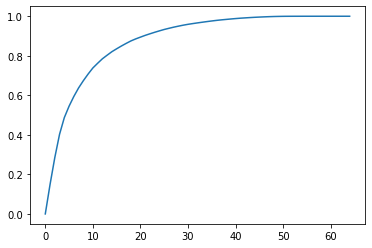

In [18]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, X_train.shape[1]+1)], [np.sum(pca.explained_variance_ratio_[:i]) for i in range(0, X_train.shape[1]+1)])
plt.show()


In [32]:
pca = PCA(0.95)
pca.fit(X_train)
print(pca.n_components_)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
%time knn_clf.fit(X_train_reduction, y_train)
knn_clf.score(X_test_reduction, y_test)


28
CPU times: user 11.7 ms, sys: 196 µs, total: 11.9 ms
Wall time: 1.5 ms


0.98

9


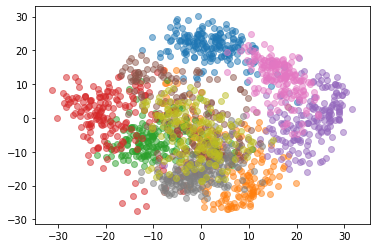

In [34]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

print(np.max(y))
for i in range(0, np.max(y)):
    plt.scatter(X_reduction[y == i, 0], X_reduction[y == i, 1],alpha=0.5)
plt.show()
